In [1]:
from libs.util import *
from libs.dynamic import *
from libs.factory import *
import numpy as np
import networkx as nx
import pysindy as ps
from scipy.optimize import curve_fit

[(0, 3), (1, 7), (2, 4), (3, 4), (4, 5), (5, 5), (6, 4), (7, 3), (8, 3), (9, 2)]


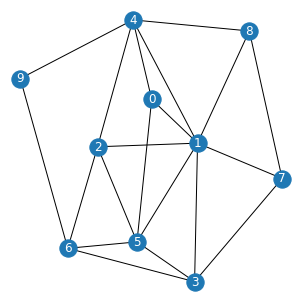

In [8]:
dynamic = 'bio'  # bio, population, epidemic
topology = 'small_world'  # erdos_renyi, small_world, scale_free
func = get_dynamic_function(dynamic)

seed = 1234
number_of_nodes = 10
alpha = -0.5
np.random.seed(seed)
x0 = np.random.rand(number_of_nodes) * 10

graph = get_graph(number_of_nodes, topology, seed=seed)
print(graph.degree)
plt.rcParams["figure.figsize"] = (4,4)
nx.draw(graph, with_labels=True, font_color='white')
plt.show()

## SINDy

In [10]:
dt = .01
x_train = create_dataset(graph, func, x0, dt)

custom_library = get_custom_library(dynamic)
model = ps.SINDy(feature_library=custom_library)
result = model.fit(x_train, t=dt)
model.print()

/home/ali/.local/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


x0' = -0.001 x0 x4 + 0.001 x0 x8 + 0.006 x1 x4 + -0.046 x1 x7 + -0.036 x1 x8 + -0.002 x2 x4 + 0.004 x2 x6 + -0.005 x2 x7 + 0.006 x2 x9 + 0.051 x4 x7 + 0.046 x4 x8 + -0.010 x5 x6 + 0.002 x5 x7 + 0.015 x5 x9 + 0.004 x6 x9 + 0.022 x7 x8 + -0.004 x7 x9
x1' = 0.017 1 + 0.010 x0 + 0.002 x1 + -0.036 x0 x1 + -0.001 x0 x2 + -0.237 x0 x4 + 0.002 x0 x5 + 0.073 x0 x6 + 0.017 x0 x7 + 0.285 x0 x8 + -0.027 x0 x9 + 0.027 x1 x2 + -0.120 x1 x3 + 1.451 x1 x4 + 0.002 x1 x6 + -12.054 x1 x7 + -9.324 x1 x8 + 0.014 x1 x9 + -0.002 x2 x3 + -0.630 x2 x4 + -0.006 x2 x5 + 1.101 x2 x6 + -1.320 x2 x7 + 0.093 x2 x8 + 1.660 x2 x9 + 0.025 x3 x4 + 0.013 x3 x7 + -0.108 x3 x8 + -0.003 x4 x5 + -0.011 x4 x6 + 13.377 x4 x7 + 11.924 x4 x8 + 0.017 x4 x9 + -2.502 x5 x6 + 0.397 x5 x7 + 0.001 x5 x8 + 4.043 x5 x9 + -0.005 x6 x7 + 0.006 x6 x8 + 0.960 x6 x9 + 5.846 x7 x8 + -0.998 x7 x9 + 0.002 x8 x9
x2' = -0.002 x0 x4 + 0.001 x0 x6 + 0.003 x0 x8 + -0.001 x1 x3 + 0.013 x1 x4 + -0.110 x1 x7 + -0.085 x1 x8 + -0.006 x2 x4 + 0.010 x2 x6 

In [ ]:
sindy_steady_state = find_steady_state(sindy, x_train[0], dynamic_model=model)
print('sindy_steady_state:', sindy_steady_state)

In [45]:
dt=.01
sindy_perturbed_full = sindy_steady_state * alpha
g_matrix_sindy, sindy_flow = calculate_g_by_model(sindy_perturbed_full, sindy_steady_state, model, dt)
g_sindy_dist = find_matrix_dist(g_matrix_sindy)
f_sindy, logf_sindy = calculate_f(g_matrix_sindy, graph.degree)
gamma_list_sindy = calculate_gamma(g_matrix_sindy, graph)

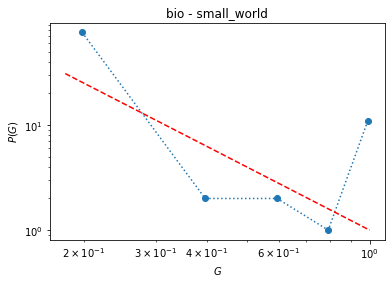

In [53]:
x = np.linspace(.18, 1, 20)
y = pow(x, -2)
plot_g(g_sindy_dist, title=f'{dynamic} - {topology}', f=(x,y))

[0.29766032 0.16372066 0.64269481 0.49429782 2.3735832  2.51617473
 0.78696698 0.48150267 0.14901355 0.7327945 ]
[4.79960736e-05 3.28637044e+00 1.02674996e-04 2.13401321e-05
 2.60010752e-01 1.77631770e-04 2.71844950e-04 3.98944976e-02
 1.99088679e-02 1.28882418e-02]
[-9.05177509  0.61142789 -6.62481375 -7.75803568 -0.83695822 -5.3657229
 -5.92246418 -2.93235102 -3.56503387 -6.27780072]


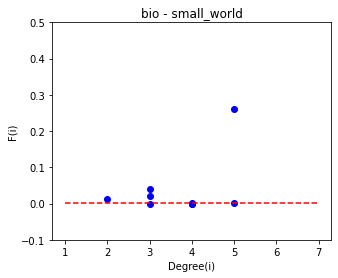

In [100]:
print(f_sindy)
print(logf_sindy)

plt.figure(4)
plt.rcParams["figure.figsize"] = (5,4)
plt.title(f'{dynamic} - {topology}')
plt.xlabel('Degree(i)')
plt.ylabel('F(i)')
plt.ylim(top=0.5, bottom=-.1)
for i in range(0,number_of_nodes):
    plt.plot(graph.degree[i], f_sindy[i], 'bo')
    
x = np.linspace(1, 7, 7)
y = [0.001]*7
plt.plot(x, y, '--r')

[2.5787152388655743, 11.74087515288879, 11.835753343618581]


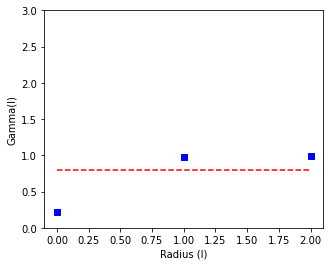

In [111]:
print(gamma_list_sindy)

plt.figure(5)
plt.rcParams["figure.figsize"] = (5,4)
plt.xlabel('Radius (l)')
plt.ylabel('Gamma(l)')
plt.ylim(top=3, bottom=0)
for i, gamma in enumerate(gamma_list_sindy):
    plt.plot(i+1, gamma/max(gamma_list_sindy), 'bs')

x = np.linspace(0, 3, 3)
y = [0.8]*3
plt.plot(x, y, '--r')